In [1]:
#Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Setting max rows to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# 1. Reading and Understanding the Data ---> EDA

In [3]:
#Read the data
df = pd.read_csv('day.csv')

In [4]:
df.head()   #Display the data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape  #Check shape of the data

(730, 16)

In [6]:
#Data quality checks
df.info()
# There are no null values in the dataset, the datatypes of each column is correctly assigned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()
# The data in each columns looks good, no data looks incorrect.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Duplicate checks
df.duplicated().value_counts()

#No duplicate rows prsent in the data

False    730
dtype: int64

In [9]:
#Drop some unwanted columns as they are not required

# instant - Just the row number, not meaningful for the analysis
# dteday - Its the date column, and can be dropped as most of the information is already splitted into other columns
# Casual & registered - building the model on cnt which is the sum of casual and registered, so we can drop these columns

df = df.drop(columns=['instant','dteday','registered','casual'],axis = 1)

In [10]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


Univariate Analysis and bivariate analysis:

For univariate and bivariate analysis, let's copy the df to a new variable bike. 

In [11]:
bike = df.copy()
#Lets replace the numerical values in the bike dataset with their actual values for better EDA 
bike.season = bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike.yr = bike.yr.map({0:2018,1:2019})
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.holiday = bike.holiday.map({0:'No',1:'Yes'})
bike.weekday = bike.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike.workingday = bike.workingday.map({0:'No',1:'Yes'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light Snow',4:'Heavy Rain'})

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='season', ylabel='Count'>

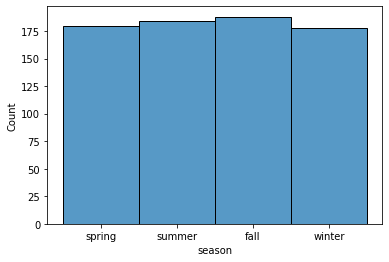

In [13]:
sns.histplot(bike.season)
#Nothing much to analyze here, data is from all the seasons. 

             temp       atemp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000  730.000000   730.000000
mean    20.319259   23.726322   62.765175   12.763620  4508.006849
std      7.506729    8.150308   14.237589    5.195841  1936.011647
min      2.424346    3.953480    0.000000    1.500244    22.000000
25%     13.811885   16.889713   52.000000    9.041650  3169.750000
50%     20.465826   24.368225   62.625000   12.125325  4548.500000
75%     26.880615   30.445775   72.989575   15.625589  5966.000000
max     35.328347   42.044800   97.250000   34.000021  8714.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


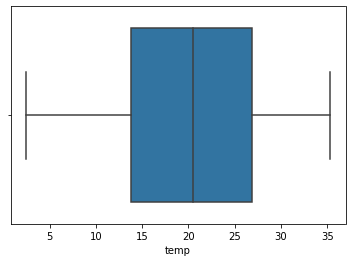

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


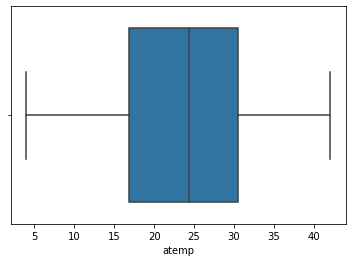

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


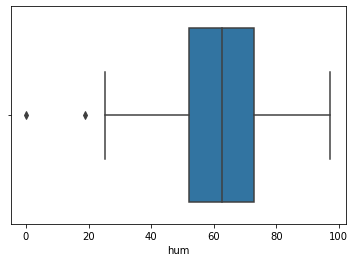

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


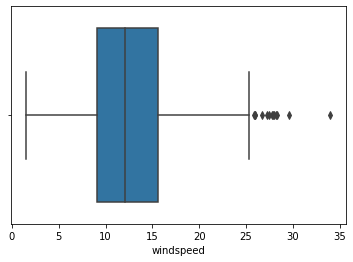

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


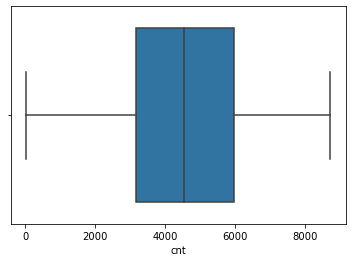

In [14]:
#Numerical variable univariate analysis
print(bike[['temp','atemp','hum','windspeed','cnt']].describe())
sns.boxplot(bike.temp)
plt.show()
sns.boxplot(bike.atemp)
plt.show()
sns.boxplot(bike.hum)
plt.show()
sns.boxplot(bike.windspeed)
plt.show()
sns.boxplot(bike.cnt)
plt.show()

-Mean temperature is 20.31, and mean feel like temperature is 23.72

-Mean feel like temperature is 20.4 and median feel like temperature is 24.4

-Humidity mean and median is around 62.6

-Mean and median windspeed is around 12

-Mean order count everyday us 4508 while median is 4548

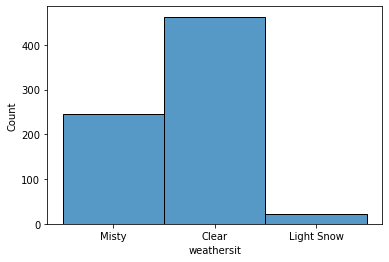

In [15]:
#Weathersit analysis
sns.histplot(bike.weathersit)
plt.show()
#weather is mostly clear, followed by misty weather and very less number of days have light snow and 
#no heavy rain days in the given data. 

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


Visualize the numerical variable against other numerical variables i.e. Bivariate Analysis

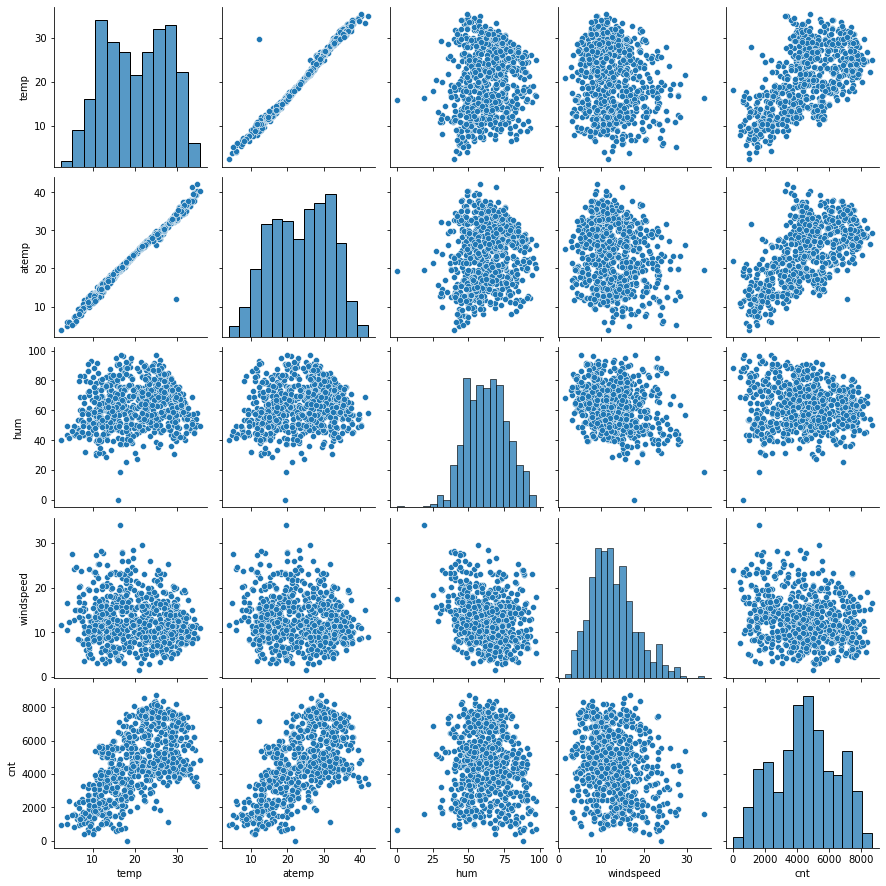

In [17]:
#Visualizing numeric variable pairplot to see how they are correlated
sns.pairplot(data = bike, x_vars = ['temp','atemp','hum','windspeed','cnt'], y_vars = ['temp','atemp','hum','windspeed','cnt'])
plt.show()

<AxesSubplot:>

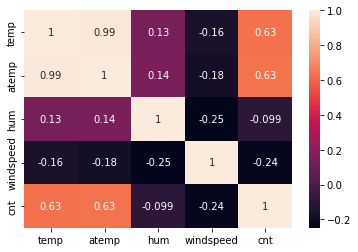

In [18]:
nm = df[['temp','atemp','hum','windspeed','cnt']]
sns.heatmap(nm.corr(),annot = True)

Observation: We could see that there is some linear trend visible in the variable temp and a temp, but for humidity and winspeed the trend is not so clear. Even the correlation coefficient for temp and atemp column is 0.63 which is a fairly good linear trend. 

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

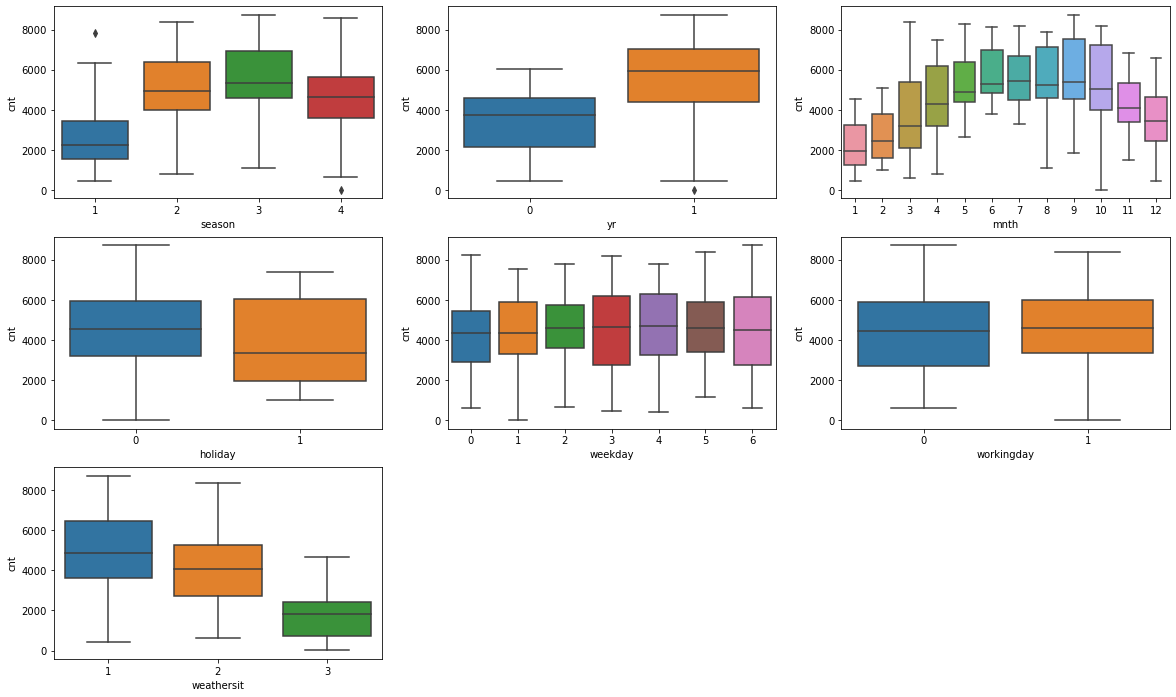

In [19]:
#Lets visualize the categorical columns also i.e. bivariate analysis

plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(data = df, x = 'season',y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data = df, x = 'yr',y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data = df, x = 'mnth',y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data = df, x = 'holiday',y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data = df, x = 'weekday',y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data = df, x = 'workingday',y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data = df, x = 'weathersit',y = 'cnt')

Lets plot the categorical variables against the cnt columns in a regular bar chart also to find any additional insights

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

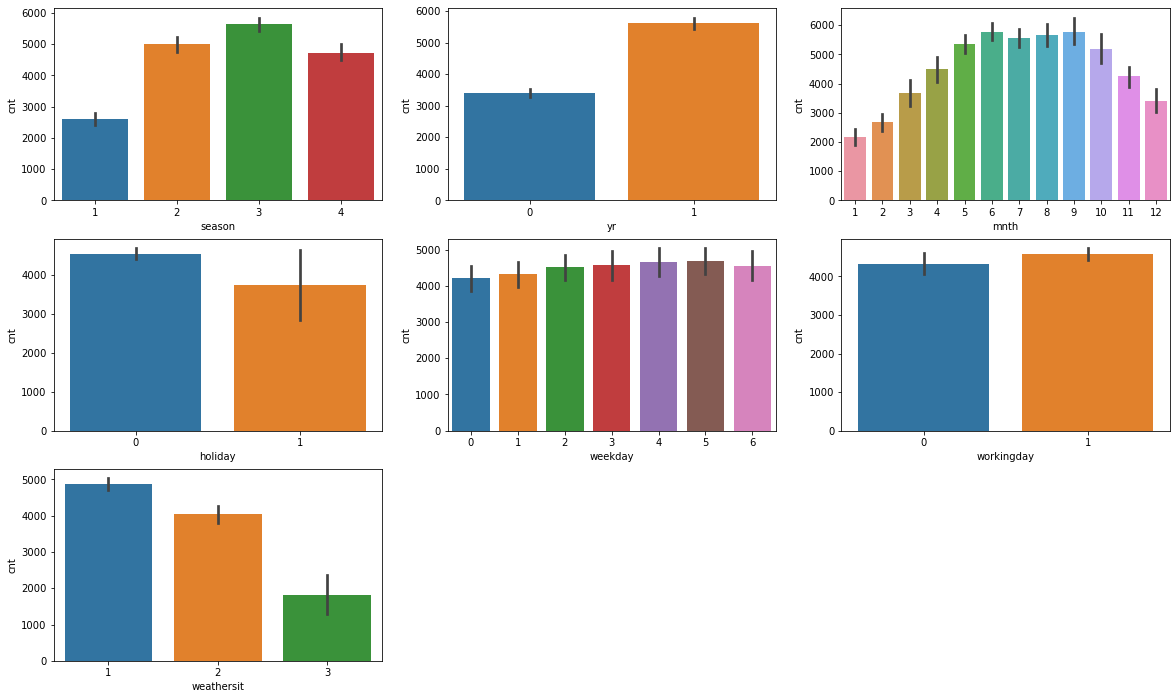

In [20]:
#Lets visualize the categorical columns also i.e. bivariate analysis

plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.barplot(data = df, x = 'season',y = 'cnt')
plt.subplot(3,3,2)
sns.barplot(data = df, x = 'yr',y = 'cnt')
plt.subplot(3,3,3)
sns.barplot(data = df, x = 'mnth',y = 'cnt')
plt.subplot(3,3,4)
sns.barplot(data = df, x = 'holiday',y = 'cnt')
plt.subplot(3,3,5)
sns.barplot(data = df, x = 'weekday',y = 'cnt')
plt.subplot(3,3,6)
sns.barplot(data = df, x = 'workingday',y = 'cnt')
plt.subplot(3,3,7)
sns.barplot(data = df, x = 'weathersit',y = 'cnt')

Observation: 
Cnt vs season - We can see that in summer and fall, the number of rider are higher compared to spring and winter

Cnt vs year - Since the data is only for 2 years, and it is a startup company, the number of rides are growing so we have higher number of rides in 2019 compared with 2018

Cnt vs month - This plot also shows somewhat same trend as the season plot, the number of rides start increasing in the month of March April, peaks around Aug-Sep and then dips dowards the end of the year, it shows some kind of seasonal trend for the bike demand, something that we also saw in the temperature charts also. 

Cnt vs Holiday - The overall spread of the data is higher on holidays, but the median requests on non-holidays days are higher. 

Cnt vs weekday - Again there is no specific trend, but weekday 3 (Wednesday) and weekday 6 (Saturday) have higher spread.

Cnt vs Workingday - Rides are slightly higher on working days. 

Cnt vs weathersit - Clear trend that the demand is higher when the skies are clear, no rain or snow (weathersit =1), demand goes very low when their is mist, rain or snowfall around (weathersit = 2 and 3)


Let's also plot some other numerical variables against the categorical columns to understand any other trend

<AxesSubplot:xlabel='weathersit', ylabel='temp'>

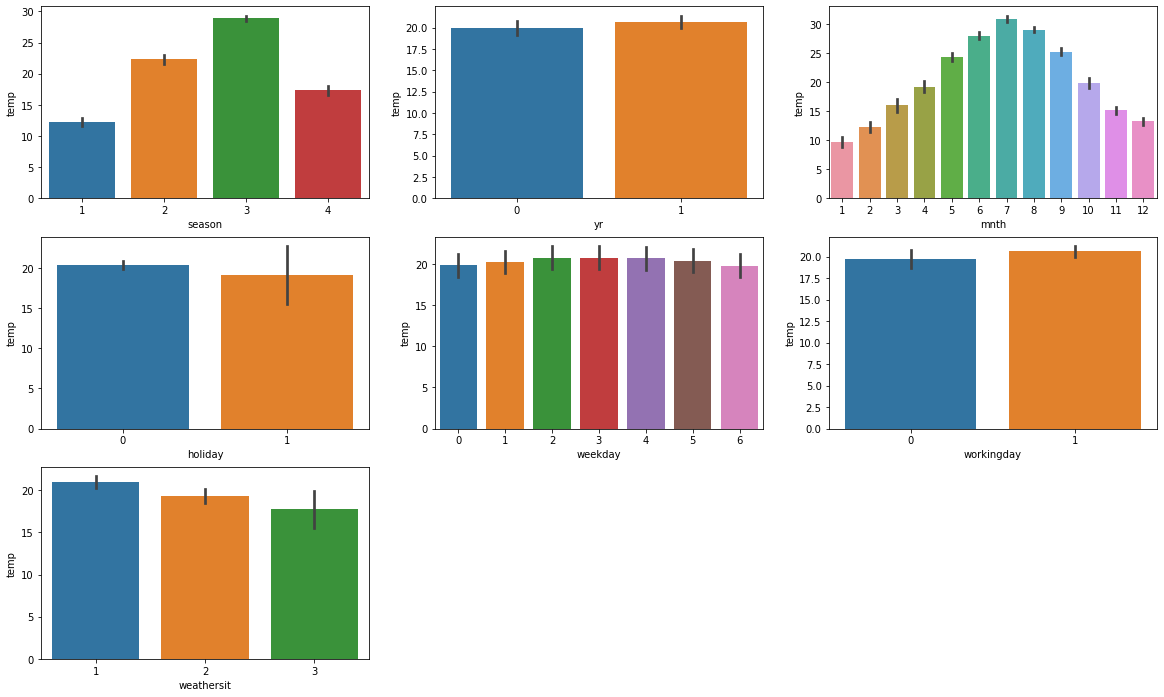

In [21]:
#Lets visualize the categorical columns also i.e. bivariate analysis

plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.barplot(data = df, x = 'season',y = 'temp')
plt.subplot(3,3,2)
sns.barplot(data = df, x = 'yr',y = 'temp')
plt.subplot(3,3,3)
sns.barplot(data = df, x = 'mnth',y = 'temp')
plt.subplot(3,3,4)
sns.barplot(data = df, x = 'holiday',y = 'temp')
plt.subplot(3,3,5)
sns.barplot(data = df, x = 'weekday',y = 'temp')
plt.subplot(3,3,6)
sns.barplot(data = df, x = 'workingday',y = 'temp')
plt.subplot(3,3,7)
sns.barplot(data = df, x = 'weathersit',y = 'temp')

<AxesSubplot:xlabel='weathersit', ylabel='hum'>

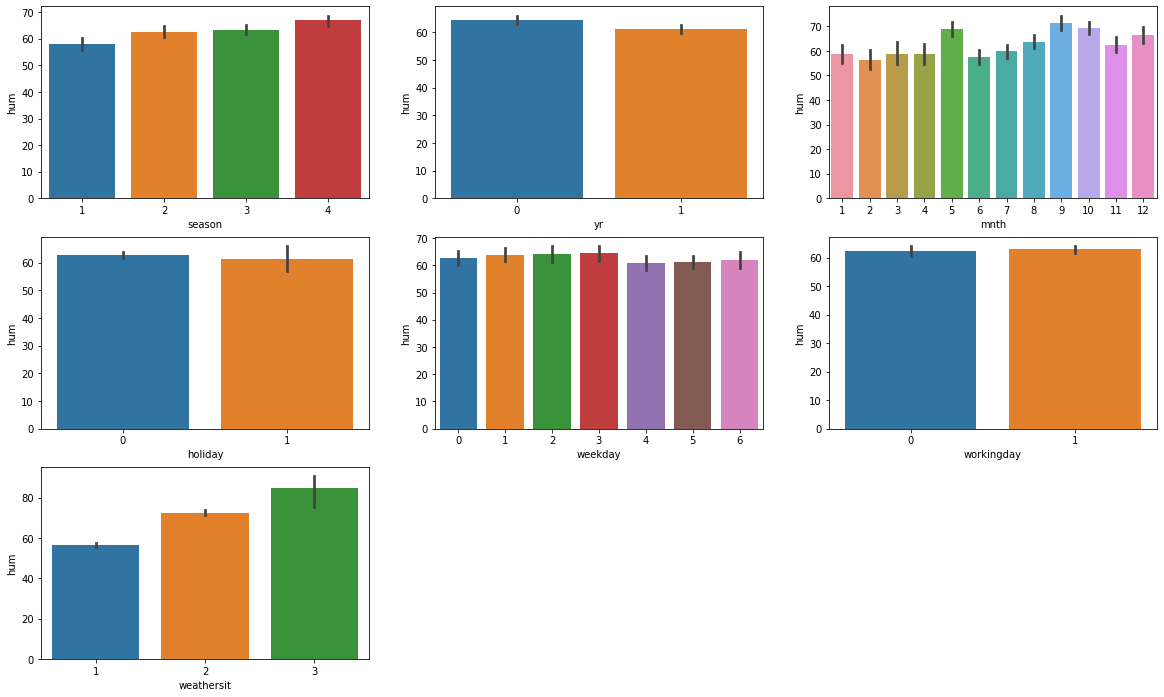

In [22]:
#Lets visualize the categorical columns also i.e. bivariate analysis

plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.barplot(data = df, x = 'season',y = 'hum')
plt.subplot(3,3,2)
sns.barplot(data = df, x = 'yr',y = 'hum')
plt.subplot(3,3,3)
sns.barplot(data = df, x = 'mnth',y = 'hum')
plt.subplot(3,3,4)
sns.barplot(data = df, x = 'holiday',y = 'hum')
plt.subplot(3,3,5)
sns.barplot(data = df, x = 'weekday',y = 'hum')
plt.subplot(3,3,6)
sns.barplot(data = df, x = 'workingday',y = 'hum')
plt.subplot(3,3,7)
sns.barplot(data = df, x = 'weathersit',y = 'hum')

<AxesSubplot:xlabel='weathersit', ylabel='windspeed'>

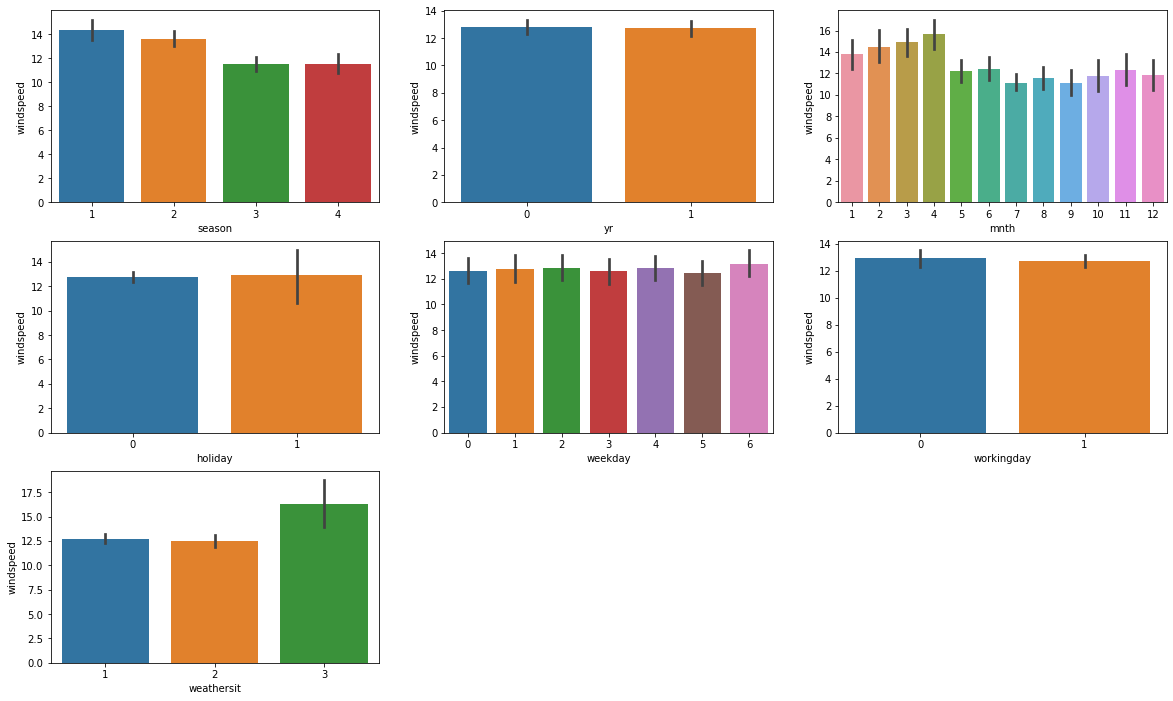

In [23]:
#Lets visualize the categorical columns also i.e. bivariate analysis

plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.barplot(data = df, x = 'season',y = 'windspeed')
plt.subplot(3,3,2)
sns.barplot(data = df, x = 'yr',y = 'windspeed')
plt.subplot(3,3,3)
sns.barplot(data = df, x = 'mnth',y = 'windspeed')
plt.subplot(3,3,4)
sns.barplot(data = df, x = 'holiday',y = 'windspeed')
plt.subplot(3,3,5)
sns.barplot(data = df, x = 'weekday',y = 'windspeed')
plt.subplot(3,3,6)
sns.barplot(data = df, x = 'workingday',y = 'windspeed')
plt.subplot(3,3,7)
sns.barplot(data = df, x = 'weathersit',y = 'windspeed')

# 2. Prepare the data for modelling

#the categorical data in the dataset is already having numerical values
- Encoding:
    - Converting binary vars to 1 and 0
    - Converting other categorical variables to dummy values
- Test train split the data
- Scale the data   

In [24]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [26]:
#Encoding the categorical data using get_dummies
#season, year,mnth,weekday,weathersit

season_d = pd.get_dummies(df['season'],drop_first=True,prefix = 'season')
mnth_d = pd.get_dummies(df['mnth'],drop_first=True,prefix = 'mnth')
weekday_d = pd.get_dummies(df['weekday'],drop_first=True,prefix = 'weekday')
weathersit_d = pd.get_dummies(df['weathersit'],drop_first=True, prefix = 'weathersit')

In [27]:
#Concat original dataframe with the new encoded datasets
df = pd.concat([df,season_d,mnth_d,weekday_d,weathersit_d],axis =1)

In [28]:
#Drop the columns for which dummy variables have been created
df = df.drop(['season','mnth','weekday','weathersit'],axis =1)

In [29]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#Prepare Data
    - Train test split
    - Rescaling
    - Encoding categorical variables

In [30]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,train_size=0.7, random_state=100)

In [31]:
#Rescaling the features
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
#Instantiate an object

scaler = MinMaxScaler()

# Fit on data (only numeric variables)
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [33]:
df_train.shape

(510, 30)

# 3. Training the model

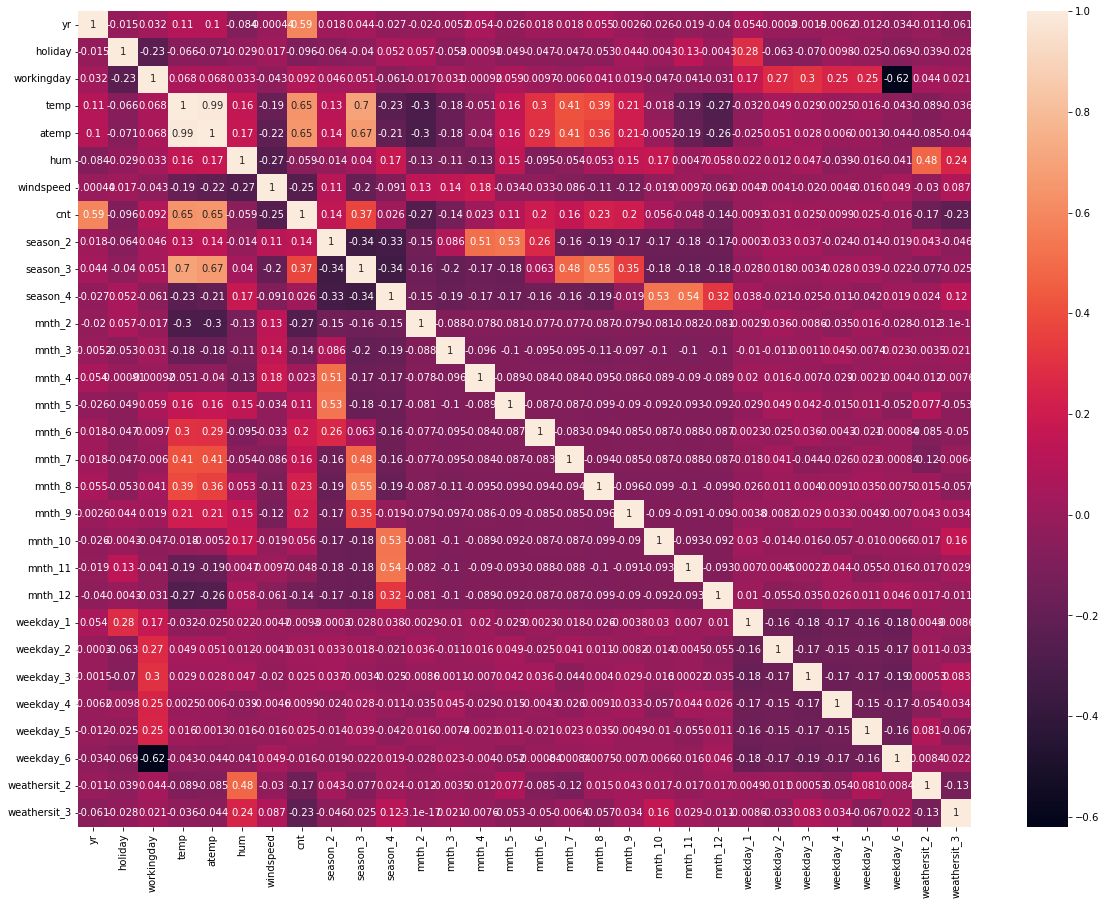

In [34]:
plt.figure(figsize = (20,15))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

We will use a mixed approach to select the variables i.e. RFE to automatically select around 15 variables for us, then fine tuning the remaining variables as requred. 

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 4),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 5),
 ('mnth_4', False, 7),
 ('mnth_5', False, 6),
 ('mnth_6', False, 8),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 17),
 ('weekday_4', False, 18),
 ('weekday_5', False, 16),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [40]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,1,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1,0


Lets start building the model with the columns selected by the RFE, using the Statsmodel as it gives more details summary of the output that will be helpful in the analysis

## Model 1 - with all the RFE recommended columns

In [41]:
#Import libraries for using stasmodels

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.20e-190
Time:                        09:46:53   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2279      0.027      8.425      0.000       0.175       0.281
yr               0.2290      0.008     28.207      0.000       0.213       0.245
holiday         -0.0926      0.026     -3.609      0.000      -0.143      -0.042
temp             0.5405      0.022     24.559      0.000       0.497       0.584
hum             -0.1748      0.037     -4.666      0.000      -0.248      -0.101
windspeed       -0.1849      0.026     -7.210      0.000      -0.235      -0.135
season_2         0.1042      0.011      9.578      0.000       0.083       0.126
season_4         0.1468      0.011     13.771      0.000       0.126       0.168
mnth_8           0.0547      0.016      3.355      0.001       0.023       0.087
mnth_9           0.1220      0.016      7.535      0.000       0.090       0.154
weekday_6        0.0161      0.011      1.447      0.148      -0.006       0.038
weathersit_2    -0.0533      0.010     -5.080      0.000      -0.074      -0.033
weathersit_3    -0.2349      0.026     -8.928      0.000      -0.287      -0.183
==============================================================================
Omnibus:                       61.236   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.479
Skew:                          -0.675   Prob(JB):                     1.26e-28
Kurtosis:                       5.055   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have build the model with the columns suggested by RFE, we can now try to fine tune the model by manually eliminating the columns based on the P value and VIF. Since this involves multiple steps, let's write a function to drop a feature and rebuild the model, calculate the VIF and show the results. It returns the X, X_sm and model itself in the response which can be used for the next stage of the analysis. 

Function Name: rebuild_model_vif

Input - Column name to drop

        X (X dataset)
        
        y (y target variable)
        
        
Output - X (with dropped column)

         X_sm (X with constant)
         
         lm (linear model)
         

In [42]:
def rebuild_model_vif(column_name_drop,X,y):
    X = X.drop(column_name_drop,axis =1)
    
    #Build the model again
    X_sm = sm.add_constant(X)

    lr = sm.OLS(y,X_sm)

    lr_model = lr.fit()
    print(lr_model.summary())
    
    #VIF Calculation   

    # VIF dataframe
    vif = pd.DataFrame() #Empty DataFrame
    vif["feature"] = X.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    vif["VIF"] = round(vif["VIF"],2)


    print(vif)
    
    #Return the df by dropping the columns
    return X,X_sm,lr_model

## Model 2 - Remove weekday_6, high p-value of 0.148

In [43]:
#Drop season3, it has high P value
#X_train_rfe = X_train_rfe.drop('season_3',axis =1)
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('weekday_6',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.50e-191
Time:                        09:46:54   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2322      0.027      8.623   

# Model 3 - Remove humidity, high VIF


In [44]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('hum',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.62e-187
Time:                        09:46:54   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837   

# Model 4 - Remove mnth_8, high VIF

In [45]:
X_train_rfe,X_train_rfe_sm,final_model = rebuild_model_vif('mnth_8',X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          2.83e-186
Time:                        09:46:54   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1259      0.017      7.508   

### We have now got a R2 of .830 and adjusted R2 of .827
### p-values are all zeroes, which means the coefficients are significant. 
### F-stat of 271.9 and F-stat probalility is 2.83e-186 which is zero, which meansthe overall model fit is very good. 
### Equation ---> cnt = (const* 0.1259) +(yr* 0.2329) +(holiday* -0.0987)+(temp* 0.5480)+(windspeed* -0.1532)+(season_2* 0.0881)+(season_4* 0.1293)+(mnth_9* 0.1012)+(weathersit_2* -0.0784)+(weathersit_3* -0.2829)

# 4. Residual Analysis

In [46]:
y_train_pred = final_model.predict(X_train_rfe_sm)

In [47]:
res = y_train-y_train_pred

<AxesSubplot:ylabel='Density'>

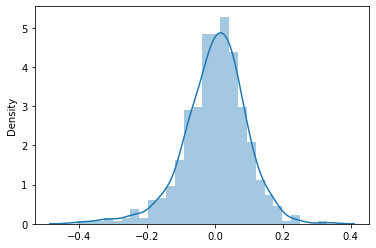

In [48]:
sns.distplot(res)

- Error terms are normally distributed with zero mean
- Linear relationship between a number of numeric variables and cnt variable, which we saw in the pairplot during the EDA
- No multicollinearity between the predictor variables in the final model, checked using the VIF table (all less than 5) in the final model

# 5. Model prediction and evaluation

In [49]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [50]:
# Transform only, on data (only numeric variables)
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test = df_test.pop('cnt')

X_test = df_test

In [53]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [54]:
#Remove the features not present in the final model
X_test = X_test[['yr','holiday','temp','windspeed','season_2','season_4','mnth_9','weathersit_2','weathersit_3']]

In [55]:
X_test_sm = sm.add_constant(X_test)

In [56]:
y_test_pred = final_model.predict(X_test_sm)

In [57]:
round(r2_score(y_true=y_test, y_pred=y_test_pred),2)

0.79

R2 on the test set is also .79 which is very close to the training set

In [58]:
#Error distribution on the test set
res = y_test - y_test_pred

<AxesSubplot:ylabel='Density'>

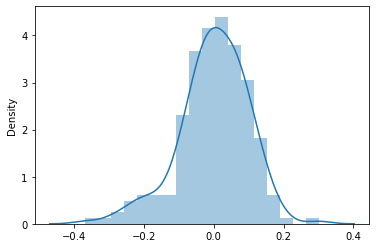

In [59]:
sns.distplot(res)

Error terms are normally distributed around zero mean for the test set also. 

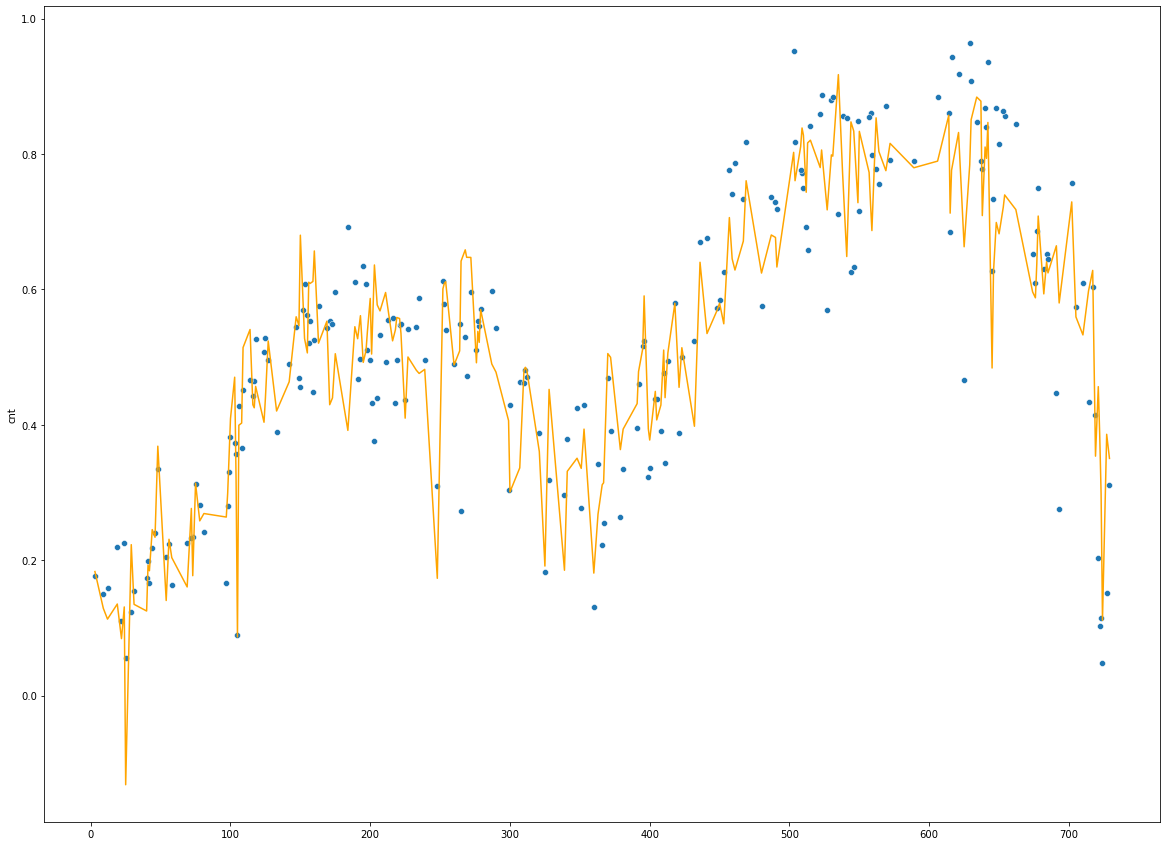

In [60]:
#Plot y_test vs y_test_pred

plt.figure(figsize = (20,15))
sns.scatterplot(data = y_test)
sns.lineplot(data = y_test_pred,color='orange')
plt.show()


Actual and predicted values are very close in the final prediction for the test set

### Final Model :

cnt = (const * 0.1259) +(yr * 0.2329) +(holiday * -0.0987)+(temp * 0.5480)+(windspeed * -0.1532)+(season_2 * 0.0881)+(season_4 * 0.1293)+(mnth_9 * 0.1012)+(weathersit_2 * -0.0784)+(weathersit_3 * -0.2829)

- R2 training - 0.830

- Adjusted R2 training set - 0.827

- R2 test - 0.79

### Summary and Conclusion

Most important features that impact the demand
- temp ~ For every unit increase in temperature, demand rises by .548 times, which is very significant
- year ~ With each year the demand can rise by .23 times, year is also a significant variable and for a startup company the 
         starting years are years of growth
- windspeed ~ Windspeed is negatively impacting the demand, for unit rise in windspeed the demand decreases by .153
- season_2 (Spring) and season_4(Winter) are also significantly impacting the demand i.e. .0881 & .1293 respectively
- weathersit_2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and weathersit_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) are also negatively impacting the demand by 0.0784 and 0.2829 respectively. 

It is recommended that the above factors are considered in particular while planning to cater the demand. 